In [ ]:
from google.colab import drive

In [2]:
import pandas as pd

# Read the raw data file
df = pd.read_csv('/content/rawdata.csv')


In [3]:
df.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,False
1,71.5,136,19,31,False
2,69.4,153,45,29,False
3,68.2,142,22,28,True
4,67.8,144,29,24,True


**Data pre-processing**

In [24]:

# changing the column names
df = df.rename(columns={'Height (Inches)': 'Height', 'Weight (Pounds)': 'Weight','Grip strength':'Grip_strength'}) 

# find any null values and remove the rows containing them
df = df.dropna()

# Converting the values of Y and N to True or False
df['Frailty'] = df['Frailty'].replace({'Y': True, 'N': False}) # Convert the 'Frailty' column to boolean values

#resetting the index
df = df.reset_index(drop=True) 

df.head()

,Height,Weight,Age,Grip_strength,Frailty
0,65.8,112,30,30,False
1,71.5,136,19,31,False
2,69.4,153,45,29,False
3,68.2,142,22,28,True
4,67.8,144,29,24,True


In [30]:
# Saving into a new file
df.to_csv('/content/cleaned_data.csv', index=False)

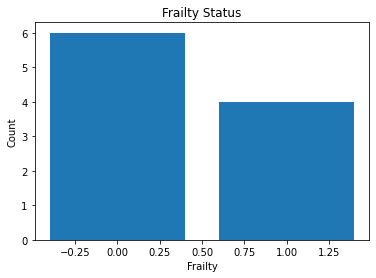

In [13]:
import matplotlib.pyplot as plt



# Count the number of individuals in each frailty group
counts = {}
for f in df['Frailty']:
    if f in counts:
        counts[f] += 1
    else:
        counts[f] = 1

# Create the bar plot
plt.bar(counts.keys(), counts.values())
plt.xlabel('Frailty')
plt.ylabel('Count')
plt.title('Frailty Status')
plt.show()


This plot shows the number of individuals in each Frailty group. There are 4 individuals in the TRUE group and 6 individuals in the FALSE group

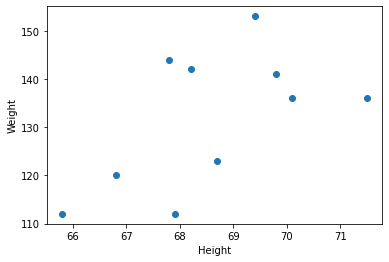

In [27]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


This plot shows the relationship between Height and Weight for the 10 individuals in the dataset. There doesn't appear to be a very strong relationship between the two variables.

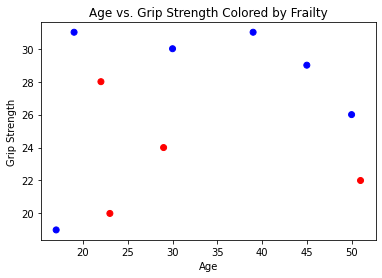

In [32]:

# Create a dictionary to map Frailty values to colors
colors = {False: 'blue', True: 'red'}

plt.scatter(df['Age'], df['Grip_strength'], c=[colors[f] for f in df['Frailty']])
plt.xlabel('Age')
plt.ylabel('Grip Strength')
plt.title('Age vs. Grip Strength Colored by Frailty')
plt.show()


This plot shows the relationship between Age and Grip Strength, with Frailty status represented by color. Individuals in the TRUE group are shown in red, while those in the FALSE group are shown in blue. It appears that individuals in the TRUE group tend to have lower Grip Strength, regardless of age.